In [1221]:
import warnings 
warnings.filterwarnings('ignore') 

In [1222]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
# split train and test dataset
from sklearn.model_selection import train_test_split
# scaling
from sklearn.preprocessing import StandardScaler

# model building
import statsmodels.api as sm

#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# confusion metrics
from sklearn import metrics

In [1223]:
# import data
lead_df = pd.read_csv("Leads.csv")
lead_df_original = lead_df.copy() # for data retain calculation
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1224]:
#shape
lead_df.shape

(9240, 37)

In [1225]:
#inspect the dataset
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Observations:
- Most of the columns are categorical
- Website visit related informations are numerical


In [1226]:
# describe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Observations:
- In column "TotalVisitors" and "Pages Views per Visit", there is sudden change in 75% and max

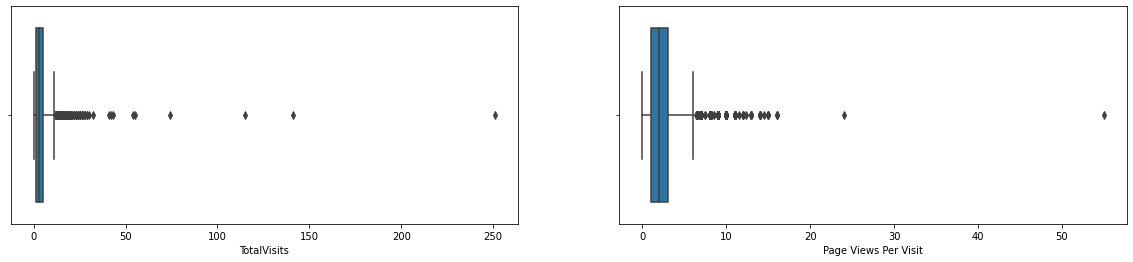

In [1227]:
# inspect outlier in "Totalvisitors" and "Pages Views per Visit "
fig, axs = plt.subplots(1,2,figsize = [20,4])
sns.boxplot(lead_df['TotalVisits'], ax = axs[0])
sns.boxplot(lead_df['Page Views Per Visit'],ax =axs[1])
plt.show()

Observation:
- Cleary both columns have outliers
- It will be treated in EDA Section 

## Step 2 : Data Cleaning

### SubTask 2.1 Dropping columns
- Few columns are to be filled by marketing person after contacting the person. Also called score variables.
- So those columns should be dropped.
- There are two columns named:
  - "Last Activity" - the lead was closed from the sales team side
  - "Last Notable Activity"- sales team representative is in touch with the lead.
  - Out of the above two , Last Activity should be dropped as lead has been closed.
- 

In [1228]:
# dropping columns 
col = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Tags','Lead Quality','Lead Profile','Last Activity']
lead_df.drop(col, axis = 1 , inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### SubTask2.2: Missing value analyses 

In [1229]:
#Check the percentage missing value cloumnwise
100*lead_df.isnull().sum()/len(lead_df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Observations:
- There are three types of columns.
  - No missing values.
  - 1% missing values- it can either be imputted or correspondig rows 
can be deleted
  - Large percentage of missing values. Need to analyse further and look for reason for missing.

### Subtask 2.3: Inspecting and cleaning columns one by one.

Inspect column "Country" 

In [1230]:

lead_df['Country'].value_counts(normalize = 1)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
Canada                   0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
South Africa             0.059006
Sweden                   0.044254
Belgium                  0.029503
Bangladesh               0.029503
Netherlands              0.029503
Philippines              0.029503
China                    0.029503
Italy                    0.029503
Ghana                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Kenya                    0.014751
Indonesia     

Observation:
- It is a highly skewed data
- It can be dropped.

In [1231]:
# drop country column
lead_df.drop('Country', axis = 1, inplace = True)

Inspect column "Lead Origin"

In [1232]:
lead_df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Inspect column "Lead Source"

In [1233]:
lead_df['Lead Source'].value_counts(normalize = True)* 100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
youtubechannel        0.010865
testone               0.010865
WeLearn               0.010865
NC_EDM                0.010865
blog                  0.010865
welearnblog_Home      0.010865
Pay per Click Ads     0.010865
Name: Lead Source, dtype: float64

Observations:
- Majority of the values are in first four categories
- Google and google is been mentioned separately, need to merged.
- Other categories with small percentage should combine under one category named , 'Others' 

In [1234]:
# merge Google and google as one identity
lead_df.loc[lead_df['Lead Source'] == 'google','Lead Source'] = 'Google' 


In [1235]:
# combine all categories with small percentage (less than 2) in one category as "Other"
df1 = pd.DataFrame(lead_df['Lead Source'].value_counts(normalize = True)*100)
colList = df1[df1['Lead Source'] < 2].index
lead_df.loc[lead_df['Lead Source'].isin(colList),'Lead Source'] = 'Others'
lead_df['Lead Source'].value_counts(normalize = True)* 100


Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.748370
Name: Lead Source, dtype: float64

In [1236]:
#inspecting missing value
100*lead_df['Lead Source'].isnull().sum()/len(lead_df)

0.38961038961038963

Observation:
- Missing value is less than 1 %.
- Cannot be imputted by any values as it is not skewed column
- Dropping few rows is a better option. 

In [1237]:
# drop rows
print("Number of rows before drop : ",lead_df.shape[0])
lead_df = lead_df[~(pd.isnull(lead_df['Lead Source']))]
print("Number of rows after drop : ",lead_df.shape[0])

Number of rows before drop :  9240
Number of rows after drop :  9204




Inspect column :"Do not Email"

In [1238]:
lead_df['Do Not Email'].value_counts()

No     8483
Yes     721
Name: Do Not Email, dtype: int64

Inspect Column: "Do not call"

In [1239]:
lead_df['Do Not Call'].value_counts()

No     9202
Yes       2
Name: Do Not Call, dtype: int64

Observation:
- Highly skewed
- It should be deleted.

In [1240]:
# drop "Do not Call"
print("Number of columns before drop : ",lead_df.shape[1])
lead_df.drop('Do Not Call', axis = 1, inplace = True)
print("Number of columns after drop : ",lead_df.shape[1])

Number of columns before drop :  28
Number of columns after drop :  27


Inspect column: "TotalVisits"

In [1241]:
# inpect missing values
print(lead_df['TotalVisits'].isnull().sum())
round(100*lead_df['TotalVisits'].isnull().sum()/len(lead_df),2)

130


1.41

Observation:
- Out of 9240 rows only 137 rows are having null value 
- 1.48% is a small percentage of missing values


In [1242]:
# impute with median
lead_df.loc[np.isnan(lead_df['TotalVisits']),'TotalVisits'] = lead_df['TotalVisits'].quantile(0.5)
# check No of missing columns after impute
print(lead_df['TotalVisits'].isnull().sum())

0


In [1243]:
# inspect outlier
lead_df['TotalVisits'].describe()

count    9204.000000
mean        3.449587
std         4.824662
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

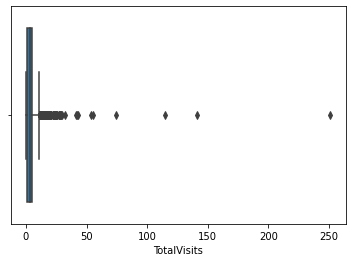

In [1244]:
# inspect outlier
sns.boxplot(lead_df['TotalVisits'])
plt.show()

Observation:
- We can see outliers in the data
- Visitor having high number of visits are important for business, should not be removed, can be capped.  

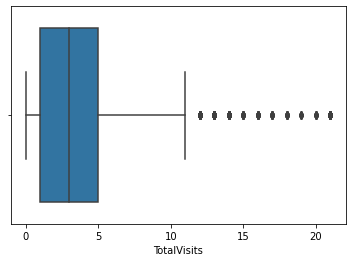

In [1245]:
# capping
lead_df.loc[lead_df['TotalVisits'] > lead_df['TotalVisits'].quantile(0.995),"TotalVisits"] = lead_df['TotalVisits'].quantile(0.995)
sns.boxplot(lead_df['TotalVisits'])
plt.show()

Inspect column :"Total Time Spent On Website"




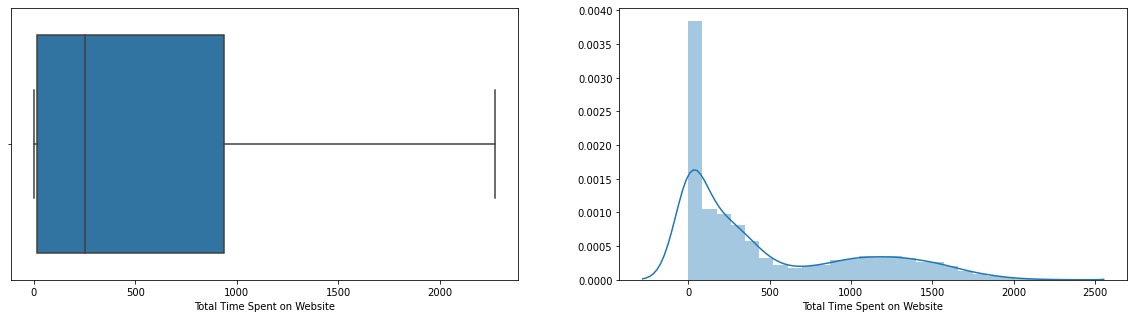

In [1246]:

plt.figure(figsize =[20,5])
plt.subplot(1,2,1)
sns.boxplot(lead_df['Total Time Spent on Website']) 
plt.subplot(1,2,2)
sns.distplot(lead_df['Total Time Spent on Website'])
plt.show()

Observation:
- There is no Outlier and No missing value.
- Goahead with it.



Inspect column: "Page Views Per Visit"

In [1247]:
# inspect missing value
print(lead_df['Page Views Per Visit'].isnull().sum())
round(100*lead_df['Page Views Per Visit'].isnull().sum()/len(lead_df),2)

130


1.41

Observation:
- The column have missing values exactle same as "TotalVisits".
- Missing value is very low in percentage. 
- It can be imputed with median value.

In [1248]:
# impute with median
lead_df.loc[np.isnan(lead_df['Page Views Per Visit']),'Page Views Per Visit'] = lead_df['Page Views Per Visit'].quantile(0.5)
# check No of missing columns after impute
print(lead_df['Page Views Per Visit'].isnull().sum())

0


handling Outlier 

In [1249]:
# inspect outliers
lead_df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.364923
std         2.145999
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

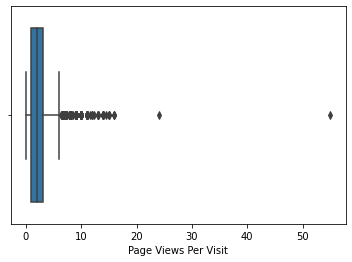

In [1250]:
# inspect outliers
sns.boxplot(lead_df['Page Views Per Visit'])

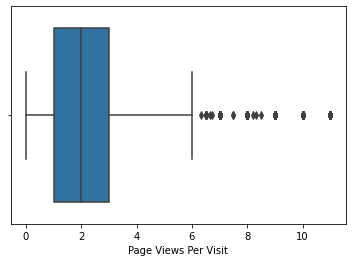

In [1251]:
# capping 
lead_df.loc[lead_df['Page Views Per Visit'] > lead_df['Page Views Per Visit'].quantile(0.995),"Page Views Per Visit"] = lead_df['Page Views Per Visit'].quantile(0.995)
sns.boxplot(lead_df['Page Views Per Visit'])

Inspect column : Last Notable Activity

In [1252]:
round(100*lead_df['Last Notable Activity'].value_counts(normalize = True),2)

Modified                        36.91
Email Opened                    30.67
SMS Sent                        23.38
Page Visited on Website          3.46
Olark Chat Conversation          1.99
Email Link Clicked               1.88
Email Bounced                    0.65
Unsubscribed                     0.49
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Form Submitted on Website        0.01
View in browser link Clicked     0.01
Email Received                   0.01
Resubscribed to emails           0.01
Name: Last Notable Activity, dtype: float64

Observation: 
- Last few categories have very less weightage .
- They can be combined togther as one category named "Other". 

In [1253]:
# combine all categories with small percentage (less than 1) in one category as "Other"
df1 = pd.DataFrame(lead_df['Last Notable Activity'].value_counts(normalize = True)*100)
colList = df1[df1['Last Notable Activity'] < 1].index
lead_df.loc[lead_df['Last Notable Activity'].isin(colList),'Last Notable Activity'] = 'Others'
lead_df['Last Notable Activity'].value_counts(normalize = True)* 100

Modified                   36.907866
Email Opened               30.671447
SMS Sent                   23.381139
Page Visited on Website     3.455020
Olark Chat Conversation     1.988266
Email Link Clicked          1.879618
Others                      1.716645
Name: Last Notable Activity, dtype: float64

In [1254]:
# inspect missing value
100*lead_df['Last Notable Activity'].isnull().sum()/len(lead_df)

0.0

Inspect Column: "Specialization" 

In [1255]:
# inspect the values in the column
round(100*lead_df['Specialization'].value_counts(normalize = True),2)

Select                               24.65
Finance Management                   12.53
Human Resource Management            10.91
Marketing Management                 10.78
Operations Management                 6.46
Business Administration               5.19
IT Projects Management                4.71
Supply Chain Management               4.49
Banking, Investment And Insurance     4.35
Media and Advertising                 2.61
Travel and Tourism                    2.61
International Business                2.29
Healthcare Management                 2.03
Hospitality Management                1.47
E-COMMERCE                            1.43
Retail Management                     1.29
Rural and Agribusiness                0.94
E-Business                            0.73
Services Excellence                   0.52
Name: Specialization, dtype: float64

Observation:
- A value "Select" has no meaning, it can be treated as null.


In [1256]:
# convert select to null
lead_df['Specialization'] = lead_df['Specialization'].replace("Select", np.nan)
round(100*lead_df['Specialization'].value_counts(normalize = True),2)

Finance Management                   16.63
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.89
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.78
Media and Advertising                 3.47
Travel and Tourism                    3.47
International Business                3.04
Healthcare Management                 2.70
Hospitality Management                1.95
E-COMMERCE                            1.90
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64

Observation :
- All select value is convertred to null
- Inspect the null percentage in the column.

In [1257]:
100*lead_df['Specialization'].isnull().sum()/len(lead_df)

36.418948283355064

Observation:
- 36% value is missing. Its a huge value.
- We cannot delete that much rows to treate Null 
- So all Null values should be filled with 'NA'.

In [1258]:
lead_df['Specialization'].fillna("NA",inplace = True)

#verify missing again
100*lead_df['Specialization'].isnull().sum()/len(lead_df)

0.0

Observation:
- All missing missing is filled with 'NA'
- No more missing value.

In [1259]:
# inspect the value again
lead_df['Specialization'].value_counts(normalize = True)* 100

NA                                   36.418948
Finance Management                   10.571491
Human Resource Management             9.202521
Marketing Management                  9.093872
Operations Management                 5.454150
Business Administration               4.378531
IT Projects Management                3.976532
Supply Chain Management               3.791830
Banking, Investment And Insurance     3.672316
Media and Advertising                 2.205563
Travel and Tourism                    2.205563
International Business                1.933942
Healthcare Management                 1.716645
Hospitality Management                1.238592
E-COMMERCE                            1.205997
Retail Management                     1.086484
Rural and Agribusiness                0.793133
E-Business                            0.619296
Services Excellence                   0.434594
Name: Specialization, dtype: float64

Inspect column : "How did you hear about X Education"

In [1260]:
100 *lead_df['How did you hear about X Education'].value_counts(normalize = True)

Select                   71.587823
Online Search            11.547806
Word Of Mouth             4.959268
Student of SomeSchool     4.430470
Other                     2.658282
Multiple Sources          2.172360
Advertisements            1.000429
Social Media              0.943261
Email                     0.371588
SMS                       0.328712
Name: How did you hear about X Education, dtype: float64

Observation:
- A very large percentage is having value as "Select", which is actually a missing value.
- with 71% missing values, drop column itself.

In [1261]:
# drop "How did you hear about X Education"
lead_df.drop('How did you hear about X Education', axis = 1, inplace= True)

Inspect column "What matters most to you in chossing a course:"

In [1262]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6492
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Observation :
- It is a higly skewed column
- It should be dropped.

In [1263]:
# drop "What matters most to you in choosing a course"
lead_df.drop('What matters most to you in choosing a course',axis = 1, inplace = True)

Inspect Column: "Search"

In [1264]:
lead_df["Search"].value_counts(normalize = True)*100

No     99.847892
Yes     0.152108
Name: Search, dtype: float64

Observation:
- It is a highly skewed data.More than 99.8 % is same value.
- This should be dropped.


In [1265]:
# drop "Search"
lead_df.drop('Search', axis = 1, inplace = True)

Inspect Column : All advertisement columns are taking togther:
- 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'

In [1266]:
# inspecting their values
for column in ['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']:
  print(lead_df[column].value_counts(normalize = True)* 100)

No    100.0
Name: Magazine, dtype: float64
No     99.97827
Yes     0.02173
Name: Newspaper Article, dtype: float64
No     99.989135
Yes     0.010865
Name: X Education Forums, dtype: float64
No     99.989135
Yes     0.010865
Name: Newspaper, dtype: float64
No     99.956541
Yes     0.043459
Name: Digital Advertisement, dtype: float64
No     99.923946
Yes     0.076054
Name: Through Recommendations, dtype: float64


Observation:
- All the columns are highly skewed, some are 100 percent skewed. 
- Not relevant , should be dropped.

In [1267]:
# drop 'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
lead_df.drop(['Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis = 1 , inplace = True)

In [1268]:
# inspect the dropping action
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9204 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9204 non-null   object 
 1   Lead Number                               9204 non-null   int64  
 2   Lead Origin                               9204 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9204 non-null   object 
 5   Converted                                 9204 non-null   int64  
 6   TotalVisits                               9204 non-null   float64
 7   Total Time Spent on Website               9204 non-null   int64  
 8   Page Views Per Visit                      9204 non-null   float64
 9   Specialization                            9204 non-null   object 
 10  What is your current occupation     

Inspect Columns: Next Three columns are on how student should receive updates.
- 'Receive More Updates About Our Courses'
- 'Update me on Supply Chain Content' 
- 'Get updates on DM Content

In [1269]:
# inspect value in those 3 columns
for column in ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content']:
  print(lead_df[column].value_counts(normalize = True)*100)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
No    100.0
Name: Get updates on DM Content, dtype: float64


Observation: 
- All three columns are 100 per cent skewed.
- All three should be dropped.

In [1270]:
# dropping 'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content columns
lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'], axis = 1, inplace = True)

Inspect Column: "City"

In [1271]:
lead_df['City'].value_counts(normalize = True)*100

Mumbai                         41.366906
Select                         28.494347
Thane & Outskirts               9.647996
Other Cities                    8.812950
Other Cities of Maharashtra     5.858171
Other Metro Cities              4.868962
Tier II Cities                  0.950668
Name: City, dtype: float64

Observation:
- Once again "Select" symbolises is missing value.
- Convert all select into null 

In [1272]:
# convert select in ot null
lead_df['City'] = lead_df['City'].replace("Select", np.nan)
lead_df['City'].value_counts(normalize = True)*100

Mumbai                         57.851240
Thane & Outskirts              13.492634
Other Cities                   12.324829
Other Cities of Maharashtra     8.192598
Other Metro Cities              6.809199
Tier II Cities                  1.329501
Name: City, dtype: float64

In [1273]:
# inspect missing value in City
round(100*lead_df['City'].isnull().sum()/len(lead_df),2)

39.53

Observation:
- It is very high percentage of missing values almost 40%.
- Since it is an Online class, location may not be business issues.
- Lets drop this column.

In [1274]:
# drop city
lead_df.drop('City', axis = 1, inplace = True)


Inspect Column "I agree to pay the amount through cheque"

In [1275]:
# inspect the value
lead_df['I agree to pay the amount through cheque'].value_counts()

No    9204
Name: I agree to pay the amount through cheque, dtype: int64

Observation:
- Just having one value, 100% skewed.
- Drop this column

In [1276]:
# drop "I agree to pay the amount through cheque"
lead_df.drop("I agree to pay the amount through cheque", axis = 1,inplace = True)

Inspect Column "A free copy of Mastering The Interview"

In [1277]:
# inspect value in column
lead_df['A free copy of Mastering The Interview'].value_counts()

No     6316
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Inspect column: "'What is your current occupation"

In [1278]:
# inspect Values
100*lead_df['What is your current occupation'].value_counts(normalize = True)

Unemployed              85.462082
Working Professional    10.807492
Student                  3.208474
Other                    0.245625
Housewife                0.153516
Businessman              0.122812
Name: What is your current occupation, dtype: float64

Observation:
- This is also a skewed column , but not that high.
- Combine the values which are less than one percent as "Other"

In [1279]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace({"Housewife":"Other","Businessman":"Other"})

#inspect gain
lead_df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.462082
Working Professional    10.807492
Student                  3.208474
Other                    0.521953
Name: What is your current occupation, dtype: float64

In [1280]:
# inspect missing value
round(100*lead_df['What is your current occupation'].isnull().sum()/len(lead_df),2)

29.23

Observation:
- column has high percentage of missing value.
- It is categorical column 
- not having a proper value to impute. 

- drop the corresponding rows 

 

In [1281]:
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             6514 non-null   object 
 1   Lead Number                             6514 non-null   int64  
 2   Lead Origin                             6514 non-null   object 
 3   Lead Source                             6514 non-null   object 
 4   Do Not Email                            6514 non-null   object 
 5   Converted                               6514 non-null   int64  
 6   TotalVisits                             6514 non-null   float64
 7   Total Time Spent on Website             6514 non-null   int64  
 8   Page Views Per Visit                    6514 non-null   float64
 9   Specialization                          6514 non-null   object 
 10  What is your current occupation         6514 non-null   obje

Final inspection of  Missing values 

In [1282]:

round(100*lead_df.isnull().sum()/len(lead_df),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Percentage of rows retained:


In [1283]:
retain_percent = round(100 *len(lead_df)/len(lead_df_original),2)
print("retained percentage of rows :",retain_percent)

retained percentage of rows : 70.5


Check data is imbalance or not


In [1284]:
lead_df['Converted'].value_counts()

0    3352
1    3162
Name: Converted, dtype: int64

Observation:
- Dataset is balanced

## EDA

Correlation between numerical columns

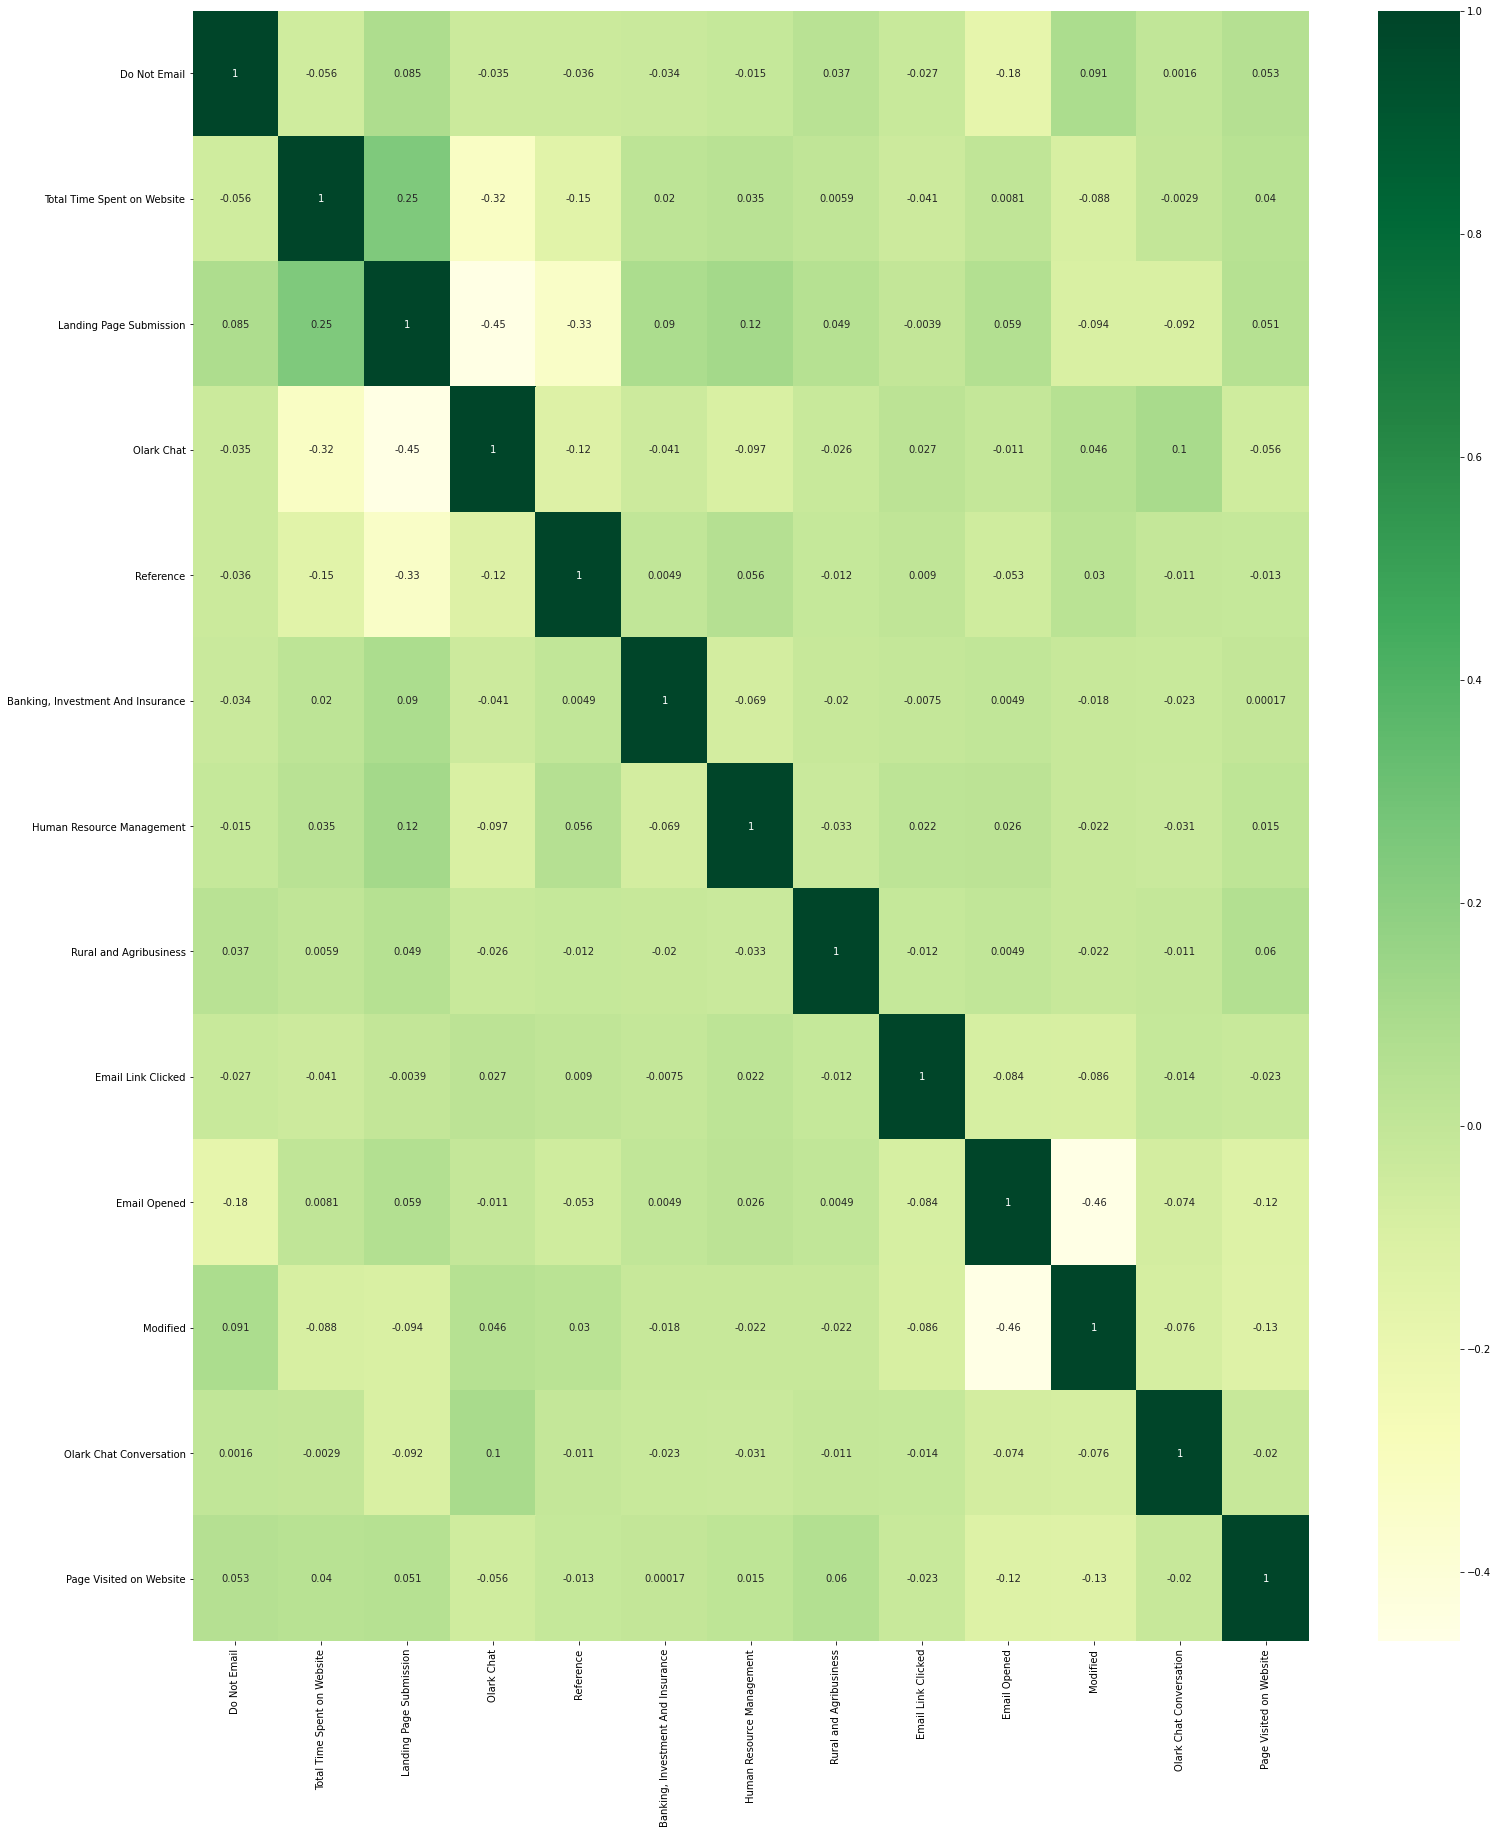

In [1285]:
plt.figure(figsize= [25,30] )
sns.heatmap(X_train.corr(),annot = True,cmap='YlGn')
plt.show()

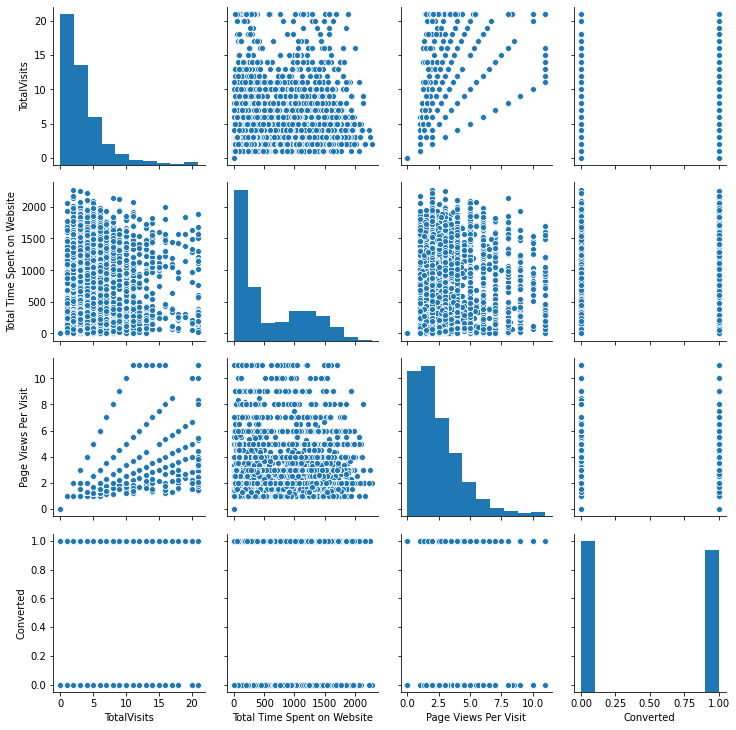

In [1286]:
# scatter plot
sns.pairplot(lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

Bivariate Analysis of categorical column with target column

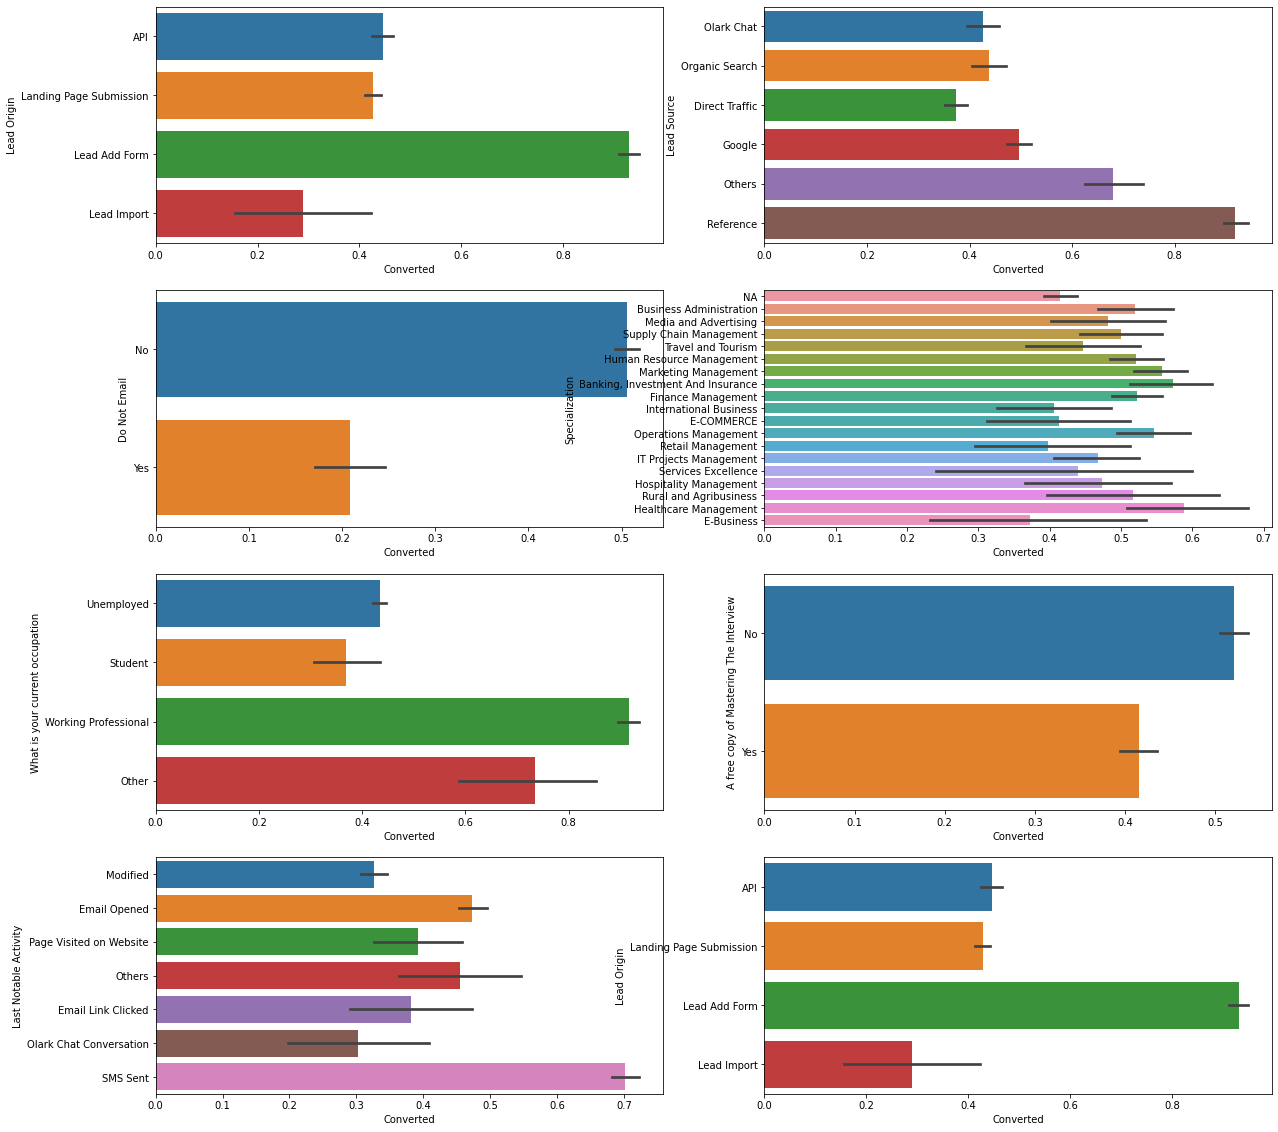

In [1287]:
cat_col = [['Lead Origin','Lead Source'],['Do Not Email','Specialization'],['What is your current occupation',
           'A free copy of Mastering The Interview'],['Last Notable Activity','Lead Origin']]
fig, axs = plt.subplots(4,2,figsize = [20,20])
for i in range(len(cat_col)):
  for j in range(2):
    sns.barplot(y = lead_df[cat_col[i][j]], x = lead_df['Converted'], ax = axs[i,j])
plt.show()

## Step 3. Data Preparation

In [1288]:
# The first two column "Prospect Id" and "Lead Number" is not important during modelling , lets drop these two columns
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

### Subtask 3.1 Dummy variables

In [1289]:
#inspect Lead Origin before crating dummy variables
lead_df['Lead Origin'].value_counts()

Landing Page Submission    3643
API                        2141
Lead Add Form               685
Lead Import                  45
Name: Lead Origin, dtype: int64

In [1290]:
# creating dummy variables
df1 = pd.get_dummies(lead_df['Lead Origin'])

# Lead Import has very less value , lets drop that
df1.drop('Lead Import', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

Observation:
- Three new dummy variables has been created.
- No of columns increased to 13

In [1291]:
# dummy variable for "Lead Source"
# inspect before creating dummy variables
lead_df['Lead Source'].value_counts()

Google            2048
Direct Traffic    1891
Olark Chat         893
Organic Search     870
Reference          534
Others             278
Name: Lead Source, dtype: int64

In [1292]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Lead Source'])

# "Others" doesnt give any sense , lets drop that
df1.drop('Others', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

Observation:
- Five new dummy variables has been created.
- No of columns increased to 18

In [1293]:
# dummy variable for "Specialization"
# inspect the column before vreating dummy variable
lead_df["Specialization"].value_counts()

NA                                   1919
Finance Management                    759
Marketing Management                  677
Human Resource Management             675
Operations Management                 394
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 124
Hospitality Management                 93
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: Specialization, dtype: int64

In [1294]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Specialization'])

# "NA" doesnt give any sense , lets drop that
df1.drop('NA', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

Observation:
- Eighteen new dummy variables has been created.
- No of columns increased to 36

In [1295]:
# dummy variable for "What is your current occupation"
# inspect the column before vreating dummy variable
lead_df["What is your current occupation"].value_counts()

Unemployed              5567
Working Professional     704
Student                  209
Other                     34
Name: What is your current occupation, dtype: int64

In [1296]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['What is your current occupation'])

# "Other" doesnt give any sense , lets drop that
df1.drop('Other', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

Observation:
- Three new dummy variables has been created.
- No of columns increased to 39

In [1297]:
#  dummy variable for "Last Notable Activity"
#inspect "Last Notable Activity" before creating dummy variables
lead_df['Last Notable Activity'].value_counts()

Modified                   2086
Email Opened               2038
SMS Sent                   1869
Page Visited on Website     214
Others                      121
Email Link Clicked          110
Olark Chat Conversation      76
Name: Last Notable Activity, dtype: int64

In [1298]:
# creat dummy variables for Lead Source
df1 = pd.get_dummies(lead_df['Last Notable Activity'])

# "Others" doesnt give any sense , lets drop that
df1.drop('Others', axis = 1, inplace = True)

#concat
lead_df = pd.concat([lead_df,df1],axis = 1)

#inspect
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6514 non-null   object 
 1   Lead Source                             6514 non-null   object 
 2   Do Not Email                            6514 non-null   object 
 3   Converted                               6514 non-null   int64  
 4   TotalVisits                             6514 non-null   float64
 5   Total Time Spent on Website             6514 non-null   int64  
 6   Page Views Per Visit                    6514 non-null   float64
 7   Specialization                          6514 non-null   object 
 8   What is your current occupation         6514 non-null   object 
 9   A free copy of Mastering The Interview  6514 non-null   object 
 10  Last Notable Activity                   6514 non-null   obje

Observation:

- Six new dummy variables has been created.
- No of columns increased to 45

Drop all the main columns whose dummy variables are created.


In [1299]:
lead_df.drop(['Lead Origin','Lead Source','Specialization','What is your current occupation','Last Notable Activity'],axis = 1, inplace = True)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            6514 non-null   object 
 1   Converted                               6514 non-null   int64  
 2   TotalVisits                             6514 non-null   float64
 3   Total Time Spent on Website             6514 non-null   int64  
 4   Page Views Per Visit                    6514 non-null   float64
 5   A free copy of Mastering The Interview  6514 non-null   object 
 6   API                                     6514 non-null   uint8  
 7   Landing Page Submission                 6514 non-null   uint8  
 8   Lead Add Form                           6514 non-null   uint8  
 9   Direct Traffic                          6514 non-null   uint8  
 10  Google                                  6514 non-null   uint


### Subtask 3.2 Mapping yes/ no type variable
- "Do Not Email" and "A free copy of Mastering The Interview" columns having yes/ no type values . So no need to create dummy variables for them .<br>
- Map "yes" to '1' and "no" to '0' 

In [1300]:
# mapping 
lead_df['Do Not Email'] = lead_df['Do Not Email'].map({"Yes":1,"No":0})
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({"Yes":1,"No":0})


In [1301]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6514 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Do Not Email                            6514 non-null   int64  
 1   Converted                               6514 non-null   int64  
 2   TotalVisits                             6514 non-null   float64
 3   Total Time Spent on Website             6514 non-null   int64  
 4   Page Views Per Visit                    6514 non-null   float64
 5   A free copy of Mastering The Interview  6514 non-null   int64  
 6   API                                     6514 non-null   uint8  
 7   Landing Page Submission                 6514 non-null   uint8  
 8   Lead Add Form                           6514 non-null   uint8  
 9   Direct Traffic                          6514 non-null   uint8  
 10  Google                                  6514 non-null   uint

### Subtask 3.3 Test train Split

In [1302]:
y = lead_df.pop('Converted')
X = lead_df

In [1303]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 50) 

In [1304]:
# inspect size of train dataset
X_train.shape

(4559, 40)

### SubTask 3.4 Scaling

In [1305]:
# instantiate StandardScaler
scaler = StandardScaler()
num_col = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website'] 
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()



,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Student,Unemployed,Working Professional,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website,SMS Sent
442,0,-0.139924,-0.832361,0.291846,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
5916,0,-1.031436,-0.945690,-1.219285,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1814,0,-0.139924,0.398331,0.291846,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3687,0,-1.031436,-0.945690,-1.219285,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
717,0,-0.437095,-0.931524,-0.211864,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


Looking at Correlations

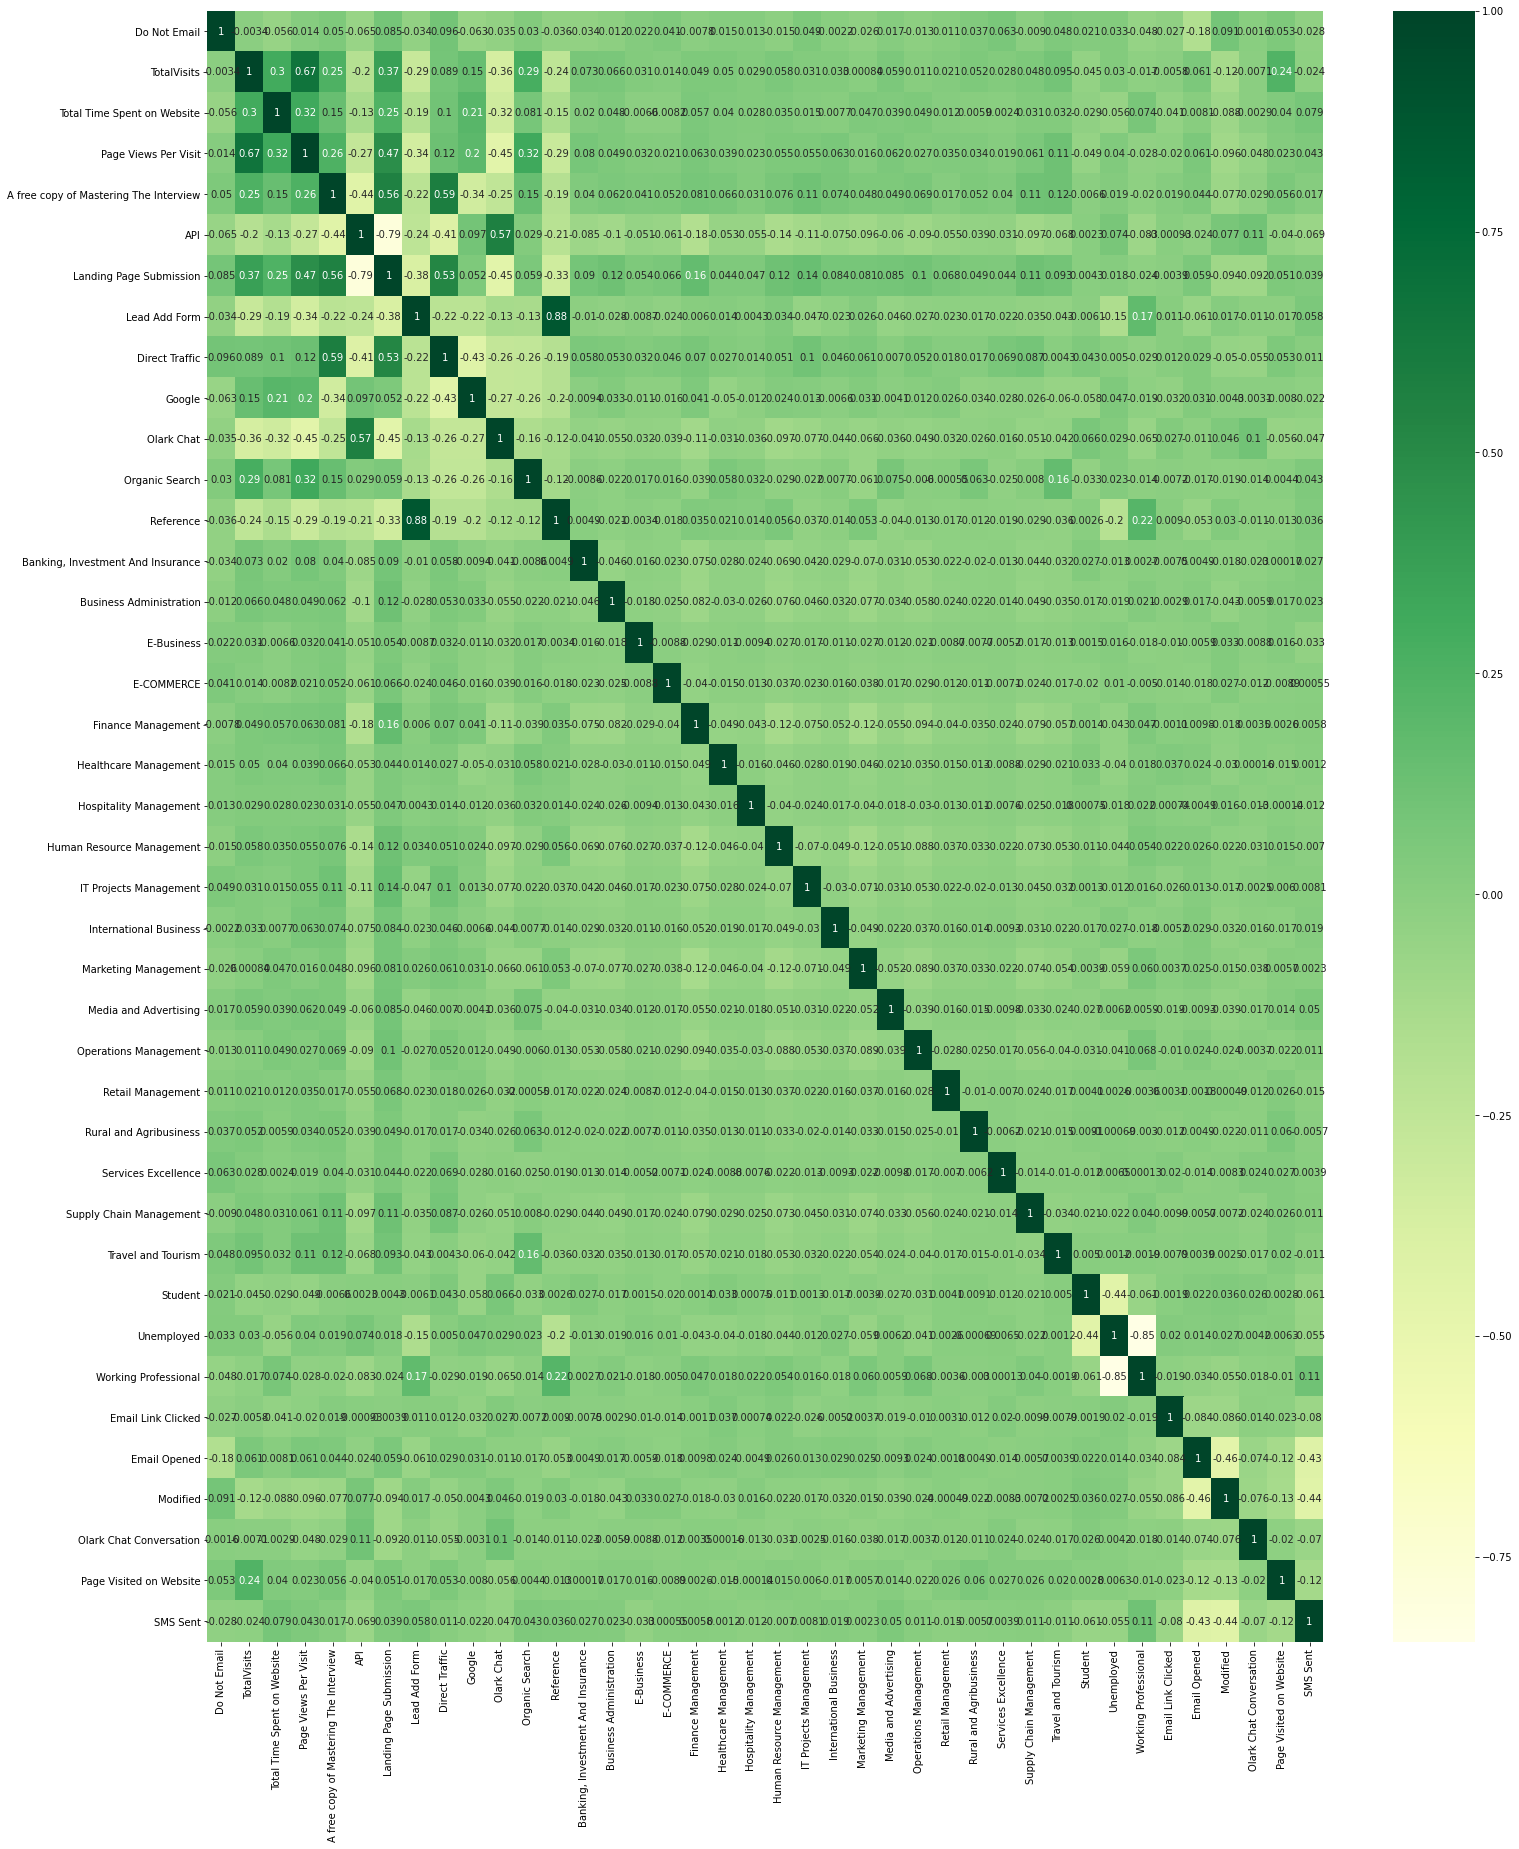

In [1306]:
plt.figure(figsize= [25,30] )
sns.heatmap(X_train.corr(),annot = True,cmap='YlGn')


## Step 4: Model Building

### Subtask 4.1 Selecting Top 25 columns using RFE 

In [1307]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

cm = LinearRegression()
cm.fit(X_train,y_train)
rfe = RFE(cm,25)
rfe  = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))





[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('A free copy of Mastering The Interview', False, 15),
 ('API', False, 8),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Direct Traffic', False, 7),
 ('Google', False, 16),
 ('Olark Chat', True, 1),
 ('Organic Search', False, 11),
 ('Reference', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', False, 2),
 ('E-Business', True, 1),
 ('E-COMMERCE', True, 1),
 ('Finance Management', True, 1),
 ('Healthcare Management', True, 1),
 ('Hospitality Management', False, 6),
 ('Human Resource Management', True, 1),
 ('IT Projects Management', True, 1),
 ('International Business', False, 5),
 ('Marketing Management', True, 1),
 ('Media and Advertising', False, 10),
 ('Operations Management', True, 1),
 ('Retail Management', False, 3),
 ('Rural and Agribusiness', True, 1),
 ('Services Excellence', Fa

In [1308]:
# dropping columns from  train dataset
col = X_train.columns[rfe.support_]
X_train = X_train[col]

# inspect
len(X_train.columns)

25

### Subtask 4.2 Build model using statsmodel 

In [1309]:
# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4533
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.7
Date:                Sun, 06 Sep 2020   Deviance:                       4125.4
Time:                        20:29:32   Pearson chi2:                 5.20e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [1310]:
# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,Lead Add Form,5.24
5,Reference,5.02
19,Unemployed,4.53
2,Landing Page Submission,4.32
21,Email Opened,1.94
22,Modified,1.93
4,Olark Chat,1.64
9,Finance Management,1.49
11,Human Resource Management,1.40
13,Marketing Management,1.38


Observation:
- E commerce has high p- value 
- drop the column

In [1311]:
# drop column
X_train.drop('E-COMMERCE',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4534
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.2
Date:                Sun, 06 Sep 2020   Deviance:                       4128.4
Time:                        20:29:33   Pearson chi2:                 5.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
3,Lead Add Form,5.23
5,Reference,5.01
18,Unemployed,4.53
2,Landing Page Submission,4.22
20,Email Opened,1.94
21,Modified,1.93
4,Olark Chat,1.64
8,Finance Management,1.47
10,Human Resource Management,1.39
12,Marketing Management,1.36


Observation:
- all p - values with in range 
- Lead Add Form has highest vif , more than 5.
- Drop "Lead Add Form" 

Observation

In [1312]:
# drop column
X_train.drop('Lead Add Form',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4535
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2186.3
Date:                Sun, 06 Sep 2020   Deviance:                       4372.6
Time:                        20:29:33   Pearson chi2:                 4.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
17,Unemployed,4.28
2,Landing Page Submission,4.11
19,Email Opened,1.94
20,Modified,1.93
3,Olark Chat,1.60
7,Finance Management,1.47
9,Human Resource Management,1.39
11,Marketing Management,1.36
4,Reference,1.33
12,Operations Management,1.23


Observation:
- "E-Business" has high p -value
- drop the column

In [1313]:
# drop column
X_train.drop('E-Business',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4536
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.2
Date:                Sun, 06 Sep 2020   Deviance:                       4376.4
Time:                        20:29:33   Pearson chi2:                 4.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
16,Unemployed,4.28
2,Landing Page Submission,4.05
18,Email Opened,1.93
19,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.45
8,Human Resource Management,1.37
10,Marketing Management,1.35
4,Reference,1.33
11,Operations Management,1.22


Observation:
- "Healthcare Management" has p -value 
- drop the column

In [1314]:
# drop column
X_train.drop('Healthcare Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4537
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2190.3
Date:                Sun, 06 Sep 2020   Deviance:                       4380.6
Time:                        20:29:34   Pearson chi2:                 4.84e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
15,Unemployed,4.28
2,Landing Page Submission,3.95
17,Email Opened,1.93
18,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.42
7,Human Resource Management,1.35
9,Marketing Management,1.33
4,Reference,1.31
10,Operations Management,1.21


Observation :
- "IT Projects Management" has high p -value
- drop the column

In [1315]:
# drop column
X_train.drop('IT Projects Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4538
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2192.3
Date:                Sun, 06 Sep 2020   Deviance:                       4384.5
Time:                        20:29:34   Pearson chi2:                 4.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
14,Unemployed,4.27
2,Landing Page Submission,3.67
16,Email Opened,1.93
17,Modified,1.92
3,Olark Chat,1.60
6,Finance Management,1.37
7,Human Resource Management,1.31
4,Reference,1.29
8,Marketing Management,1.29
9,Operations Management,1.18


Observation:
- "Finance Management" has high p- value
- Drop the column

In [1316]:
# drop column
X_train.drop('Finance Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4539
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2193.8
Date:                Sun, 06 Sep 2020   Deviance:                       4387.7
Time:                        20:29:34   Pearson chi2:                 4.82e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
13,Unemployed,4.27
2,Landing Page Submission,3.24
16,Modified,1.92
15,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.24
6,Human Resource Management,1.22
7,Marketing Management,1.21
12,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Operation Management" has high p- value
- Drop the column

In [1317]:
# drop column
X_train.drop('Operations Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4540
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2195.2
Date:                Sun, 06 Sep 2020   Deviance:                       4390.3
Time:                        20:29:35   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
12,Unemployed,4.27
2,Landing Page Submission,3.10
15,Modified,1.92
14,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.23
6,Human Resource Management,1.20
7,Marketing Management,1.19
11,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Travel and Tourism" has high p- value
- Drop the column

In [1318]:
# drop column
X_train.drop('Travel and Tourism',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4541
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2196.3
Date:                Sun, 06 Sep 2020   Deviance:                       4392.5
Time:                        20:29:35   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
11,Unemployed,4.27
2,Landing Page Submission,3.06
14,Modified,1.92
13,Email Opened,1.92
3,Olark Chat,1.59
4,Reference,1.23
6,Human Resource Management,1.19
7,Marketing Management,1.18
10,Student,1.18
1,Total Time Spent on Website,1.17


Observation:
- "Supply chain Management" has high p- value
- Drop the column

In [1319]:
# drop column
X_train.drop('Supply Chain Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4542
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2198.2
Date:                Sun, 06 Sep 2020   Deviance:                       4396.3
Time:                        20:29:35   Pearson chi2:                 4.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
10,Unemployed,4.27
2,Landing Page Submission,2.97
12,Email Opened,1.92
13,Modified,1.91
3,Olark Chat,1.59
4,Reference,1.22
6,Human Resource Management,1.18
9,Student,1.18
1,Total Time Spent on Website,1.17
7,Marketing Management,1.17


Observation:
- "Marketing Management" has high p- value
- Drop the column

In [1320]:
# drop column
X_train.drop('Marketing Management',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4543
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2199.8
Date:                Sun, 06 Sep 2020   Deviance:                       4399.5
Time:                        20:29:35   Pearson chi2:                 4.81e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
9,Unemployed,4.27
2,Landing Page Submission,2.88
11,Email Opened,1.91
12,Modified,1.91
3,Olark Chat,1.58
4,Reference,1.20
8,Student,1.18
1,Total Time Spent on Website,1.17
6,Human Resource Management,1.15
0,Do Not Email,1.13


Observation:
- "Unemployed" has high vif
- Drop the column

In [1321]:
# drop column
X_train.drop('Unemployed',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4544
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2314.1
Date:                Sun, 06 Sep 2020   Deviance:                       4628.2
Time:                        20:29:35   Pearson chi2:                 4.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
2,Landing Page Submission,2.07
10,Email Opened,1.57
11,Modified,1.52
3,Olark Chat,1.36
1,Total Time Spent on Website,1.17
4,Reference,1.15
6,Human Resource Management,1.15
0,Do Not Email,1.12
13,Page Visited on Website,1.07
5,"Banking, Investment And Insurance",1.06


Observation:
- "Student" has high p- value
- Drop the column

In [1322]:
# drop column
X_train.drop('Student',axis = 1, inplace = True)

# add constant
X_train_sm = sm.add_constant(X_train)

#build model
logml =  sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()

print(logml.summary())

# vif 
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4559
Model:                            GLM   Df Residuals:                     4545
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2315.1
Date:                Sun, 06 Sep 2020   Deviance:                       4630.2
Time:                        20:29:36   Pearson chi2:                 4.78e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

,Features,VIF
2,Landing Page Submission,2.07
9,Email Opened,1.56
10,Modified,1.51
3,Olark Chat,1.35
1,Total Time Spent on Website,1.17
4,Reference,1.15
6,Human Resource Management,1.15
0,Do Not Email,1.12
12,Page Visited on Website,1.07
5,"Banking, Investment And Insurance",1.06


In [1323]:
print("No of columns left in dataset ",X_train.shape[1])

No of columns left in dataset  13


### Subtask 4.3 Predict and Evaluate train dataset

In [1324]:
# predict train dataset
y_train_pred = logml.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

In [1325]:
# inspect churn probability
y_train_pred

array([0.16037302, 0.43217245, 0.2586908 , ..., 0.96685297, 0.38882452,
       0.10101273])

Creating a new DataFrame with actual Churn Flags and the predicted probabilities. 

In [1326]:
y_train_leadscore_df = pd.DataFrame({"LeadID":y_train.index,"Converted":y_train.values,"Conversion_prob":y_train_pred.round(2)})
y_train_leadscore_df.head()

,LeadID,Converted,Conversion_prob
0,442,0,0.16
1,5916,1,0.43
2,1814,0,0.26
3,3687,1,0.26
4,717,0,0.15


Creating new column "predicted" with 1 if "Lead_Score" >  cut-off else 0, for different values of cut-off

In [1327]:
# identify cut-off
# creat columns for prediction for different value of cut off 
for cutoff in range(1,10):
  
  y_train_leadscore_df['predicted'+str(cutoff)] = y_train_leadscore_df['Conversion_prob'].apply(lambda x:1 if x > (cutoff/10) else 0)
y_train_leadscore_df.head()


,LeadID,Converted,Conversion_prob,predicted1,predicted2,predicted3,predicted4,predicted5,predicted6,predicted7,predicted8,predicted9
0,442,0,0.16,1,0,0,0,0,0,0,0,0
1,5916,1,0.43,1,1,1,1,0,0,0,0,0
2,1814,0,0.26,1,1,0,0,0,0,0,0,0
3,3687,1,0.26,1,1,0,0,0,0,0,0,0
4,717,0,0.15,1,0,0,0,0,0,0,0,0


Creating Confusion Matrix dataframe

In [1328]:
confusion_matrix_df = pd.DataFrame(columns = ["cut-off",'accuracy','sensitivity','specificity'])
for i in range(1,10):
  cutoff = i/10  
  cm = metrics.confusion_matrix(y_train_leadscore_df.Converted,y_train_leadscore_df["predicted"+str(i)])
  total=sum(sum(cm)) 
  accuracy = (cm[0,0]+cm[1,1])/total
  sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
  specificity = cm[0,0]/(cm[0,0]+cm[0,1])
  confusion_matrix_df.loc[i-1] = [cutoff,accuracy,sensitivity,specificity]

confusion_matrix_df

,cut-off,accuracy,sensitivity,specificity
0,0.1,0.536521,0.990926,0.111253
1,0.2,0.638737,0.945554,0.351592
2,0.3,0.736565,0.874773,0.607219
3,0.4,0.757622,0.827132,0.692569
4,0.5,0.763764,0.716425,0.808068
5,0.6,0.739417,0.601633,0.868365
6,0.7,0.700812,0.468240,0.918471
7,0.8,0.665716,0.357532,0.954140
8,0.9,0.603422,0.196007,0.984713


Observation:
-  Values of accuracy, sensitivity and specificity at different cut-off value.   

Plotting ROC curve

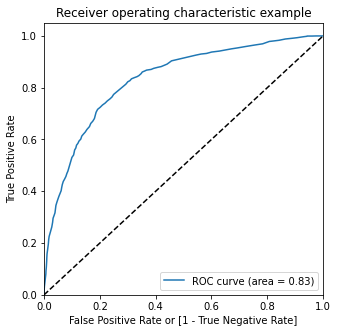

In [1329]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_leadscore_df.Converted, y_train_leadscore_df.Conversion_prob)

Optimal cut-off value

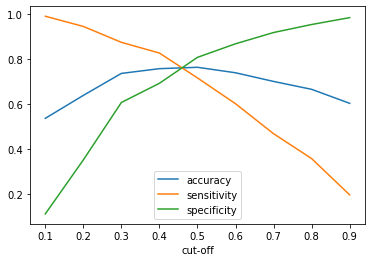

In [1330]:
# plotting all three metrics together

confusion_matrix_df.plot.line(x= 'cut-off',y = ['accuracy','sensitivity','specificity'])
plt.show()

Observation:
- __Optimal cutoff is around 4.2__

With optimal cutoff , calculate Accuarcy, Sensitivity and Specificity

In [1331]:
coff = 0.42  # cutoff
y_train_leadscore_final_df = pd.DataFrame(y_train_leadscore_df[['LeadID','Converted','Conversion_prob']])
y_train_leadscore_final_df['predicted'] = y_train_leadscore_final_df['Conversion_prob'].apply(lambda x:1 if x > coff else 0)
cm1 = metrics.confusion_matrix(y_train_leadscore_final_df.Converted,y_train_leadscore_final_df['predicted'])
sen = cm1[1,1]/(cm1[1,1]+cm1[1,0])

total=sum(sum(cm1)) 
acc = (cm1[0,0]+cm1[1,1])/total

spec = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print("Accuracy    : ",acc)
print("Sensitiviy  : ",sen)
print("Specificity : ",spec)
print()
y_train_leadscore_final_df.head()


Accuracy    :  0.7584996709804782
Sensitiviy  :  0.8135208711433757
Specificity :  0.7070063694267515



,LeadID,Converted,Conversion_prob,predicted
0,442,0,0.16,0
1,5916,1,0.43,1
2,1814,0,0.26,0
3,3687,1,0.26,0
4,717,0,0.15,0


In [1332]:
#Generate Lead score variable
y_train_leadscore_final_df['Lead_Score'] = round(y_train_leadscore_final_df['Conversion_prob']*100)
y_train_leadscore_final_df.head()


,LeadID,Converted,Conversion_prob,predicted,Lead_Score
0,442,0,0.16,0,16.0
1,5916,1,0.43,1,43.0
2,1814,0,0.26,0,26.0
3,3687,1,0.26,0,26.0
4,717,0,0.15,0,15.0


## Step 5: Model Performance on Test dataset

### Subtask 5.1 Test Data Preparation

In [1333]:
# scaling

num_col = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website'] 
X_test[num_col] = scaler.transform(X_test[num_col])
X_test [num_col].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,1955.000000,1955.000000,1955.000000
mean,0.049295,0.056640,0.051414
std,1.033283,1.037730,1.016917
min,-1.031436,-1.219285,-0.945690
25%,-0.437095,-0.715575,-0.864235
50%,-0.139924,-0.211864,-0.396749
75%,0.454417,0.795557,0.931336
max,5.204688,4.321530,2.762323


In [1334]:
# selecting final set of columns in test set 

X_test = X_test[X_train.columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Landing Page Submission,Olark Chat,Reference,"Banking, Investment And Insurance",Human Resource Management,Rural and Agribusiness,Email Link Clicked,Email Opened,Modified,Olark Chat Conversation,Page Visited on Website
6386,0,-0.945690,0,1,0,0,0,0,0,0,0,0,0
2402,0,0.587805,1,0,0,0,0,0,0,1,0,0,0
8737,0,-0.407373,1,0,0,0,0,0,0,0,0,0,1
5026,0,-0.733197,0,0,0,0,1,0,0,0,0,0,0
6422,0,-0.945690,0,0,0,0,0,0,0,0,0,0,0


### Subtask 5.2 Test Data Prediction.

In [1335]:
# predict the test set
y_test_pred_array = logml.predict(sm.add_constant(X_test))
y_test_pred_array = y_test_pred_array.values.reshape(-1)

# converting array to dataframe
y_test_leadscore_df = pd.DataFrame({"LeadID":y_test.index,"Converted":y_test.values,"Conversion_prob":y_test_pred_array.round(2)})
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob
0,6386,1,0.69
1,2402,1,0.48
2,8737,0,0.19
3,5026,1,0.67
4,6422,1,0.52


In [1336]:
# create predicted column  with cut off 0.42

cutoff = 0.42 
y_test_leadscore_df['predicted'] = y_test_leadscore_df['Conversion_prob'].apply(lambda x:1 if x > cutoff else 0)
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob,predicted
0,6386,1,0.69,1
1,2402,1,0.48,1
2,8737,0,0.19,0
3,5026,1,0.67,1
4,6422,1,0.52,1


### Subtask 5.3 Evaluate Model
- Confusion metrics
- Accuracy
- Sensitivity
- Specificity


In [1337]:
# confusion matrix , accuracy , specificity and sensiticity calculation

cutoff = 0.42
test_cm = metrics.confusion_matrix(y_test_leadscore_df.Converted,y_test_leadscore_df["predicted"])
print(test_cm)
print()

#accuracy
total=sum(sum(test_cm)) 
accuracy = (test_cm[0,0]+test_cm[1,1])/total
print("Accuracy = ",accuracy)

#sensitivity
sensitivity = test_cm[1,1]/(test_cm[1,1]+test_cm[1,0])
print("Sensitivity = ",sensitivity)

# specificity
specificity = test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
print("Specificity = ",specificity)


[[683 314]
 [191 767]]

Accuracy =  0.7416879795396419
Sensitivity =  0.8006263048016702
Specificity =  0.6850551654964895


Observation:
- Comapare to train dataset
- Accuracy train = 0.75 ; test  = 0.73
- Sensitivity train = 0.81 ; test = 0.80
- Specificity train = 0.70 ; test = 0.68

### Subtask 5.4 ROC curve and its area for test dataset

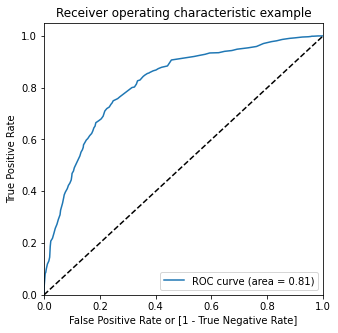

In [1338]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_leadscore_df.Converted, y_test_leadscore_df.Conversion_prob)

### Subtask 5.5 Generate Lead Score Variable

In [1339]:

y_test_leadscore_df['Lead_Score'] = y_test_leadscore_df['Conversion_prob']*100
y_test_leadscore_df.head()

,LeadID,Converted,Conversion_prob,predicted,Lead_Score
0,6386,1,0.69,1,69.0
1,2402,1,0.48,1,48.0
2,8737,0,0.19,0,19.0
3,5026,1,0.67,1,67.0
4,6422,1,0.52,1,52.0


## Recommendation: Top Variables
- Postivite variables 
    - Reference
    - Total Time Spent on Website
- Negative variables
    - Olark Chat Conversation
    - Modified